In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train_ds=pd.read_csv("/content/train.csv")
train_ds.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [6]:
test_ds=pd.read_csv("/content/test.csv")
test_ds

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330.0,19.1,393.74,6.56
101,101,6.96215,0.0,18.10,0,0.700,5.713,97.0,1.9265,24,666.0,20.2,394.43,17.11
102,102,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243.0,16.8,396.90,5.28
103,103,0.10469,40.0,6.41,1,0.447,7.267,49.0,4.7872,4,254.0,17.6,389.25,6.05


In [7]:
train_ds.shape

(400, 15)

In [8]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


In [9]:
train_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,400.0,199.500000,115.614301,0.00000,99.75000,199.50000,299.250000,399.0000
CRIM,400.0,3.757191,9.155496,0.00906,0.07782,0.24217,3.543427,88.9762
ZN,400.0,10.970000,22.796261,0.00000,0.00000,0.00000,12.500000,95.0000
INDUS,400.0,10.936425,6.848042,0.46000,5.13000,8.56000,18.100000,27.7400
CHAS,400.0,0.072500,0.259639,0.00000,0.00000,0.00000,0.000000,1.0000
NOX,400.0,0.552817,0.115488,0.38500,0.44900,0.53200,0.624000,0.8710
RM,400.0,6.292165,0.709923,4.13800,5.87750,6.20850,6.620500,8.7800
AGE,400.0,68.086000,28.386888,2.90000,42.37500,76.95000,93.825000,100.0000
DIS,400.0,3.819462,2.132445,1.12960,2.10915,3.27210,5.214600,12.1265
RAD,400.0,9.462500,8.687478,1.00000,4.00000,5.00000,24.000000,24.0000


In [10]:
train_ds.drop('ID',inplace=True,axis=1)

In [11]:
train_ds.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8
5,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334.0,22.0,376.04,5.57,20.6
6,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666.0,20.2,2.60,10.11,15.0
7,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403.0,14.7,396.90,26.82,13.4
8,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58,23.1
9,0.24522,0.0,9.90,0,0.544,5.782,71.7,4.0317,4,304.0,18.4,396.90,15.94,19.8


In [12]:
train_ds.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
train_ds.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.193548,0.409972,-0.060591,0.422635,-0.205928,0.353379,-0.376323,0.618538,0.577501,0.284967,-0.357581,0.442743,-0.393693
ZN,-0.193548,1.000000,-0.522218,-0.037318,-0.497638,0.290127,-0.554214,0.659949,-0.301067,-0.300221,-0.369974,0.161515,-0.402116,0.336805
INDUS,0.409972,-0.522218,1.000000,0.075305,0.759132,-0.396865,0.631742,-0.695199,0.608088,0.731619,0.370383,-0.338007,0.624374,-0.502898
CHAS,-0.060591,-0.037318,0.075305,1.000000,0.084020,0.091267,0.083314,-0.102016,-0.023792,-0.045183,-0.137556,0.040732,-0.055326,0.182096
NOX,0.422635,-0.497638,0.759132,0.084020,1.000000,-0.283907,0.736349,-0.768775,0.602960,0.657875,0.154693,-0.382202,0.622209,-0.434271
RM,-0.205928,0.290127,-0.396865,0.091267,-0.283907,1.000000,-0.198918,0.171596,-0.190030,-0.277064,-0.336408,0.120518,-0.634758,0.721489
AGE,0.353379,-0.554214,0.631742,0.083314,0.736349,-0.198918,1.000000,-0.750408,0.457339,0.499478,0.234894,-0.274650,0.593788,-0.354106
DIS,-0.376323,0.659949,-0.695199,-0.102016,-0.768775,0.171596,-0.750408,1.000000,-0.492090,-0.520442,-0.185938,0.274036,-0.503383,0.235087
RAD,0.618538,-0.301067,0.608088,-0.023792,0.602960,-0.190030,0.457339,-0.492090,1.000000,0.911103,0.458930,-0.395845,0.503532,-0.386922
TAX,0.577501,-0.300221,0.731619,-0.045183,0.657875,-0.277064,0.499478,-0.520442,0.911103,1.000000,0.450978,-0.400353,0.552239,-0.479308


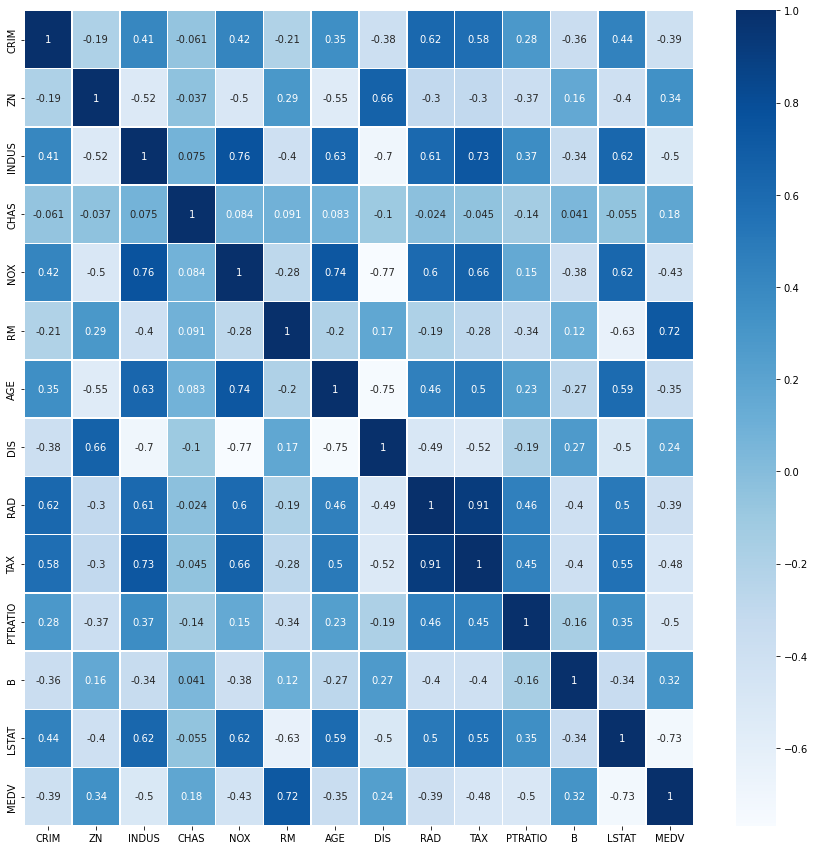

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(train_ds.corr(),annot=True,linewidth=0.5,cmap='Blues') 
plt.show()

In [17]:
X=train_ds.iloc[:,0:13]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28
1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21
2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59
3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59
4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70
396,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13
397,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666.0,20.2,396.90,13.99
398,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09


In [19]:
y=train_ds.iloc[:,-1]
y

0      14.8
1      25.0
2      41.3
3      18.4
4      19.8
       ... 
395    27.9
396    24.7
397    19.5
398    20.4
399    22.5
Name: MEDV, Length: 400, dtype: float64

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
y = np.round(train_ds['MEDV'])
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
ColumnScores = pd.concat([columns,scores],axis=1)
ColumnScores.columns = ["Column Name","Score"] 
ColumnScores

,Column Name,Score
0,CRIM,5008.889167
1,ZN,4663.607510
2,INDUS,751.483922
3,CHAS,51.706958
4,NOX,4.618684
5,RM,18.945818
6,AGE,2043.608944
7,DIS,141.060963
8,RAD,1178.002558
9,TAX,12353.034176


In [22]:
print(ColumnScores.nlargest(5,"Score"))

   Column Name         Score
9          TAX  12353.034176
0         CRIM   5008.889167
1           ZN   4663.607510
11           B   2526.039453
6          AGE   2043.608944


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 13)
(300,)
(100, 13)
(100,)


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [28]:
coeff = pd.DataFrame(model.coef_,X.columns)
coeff.columns = ['coefficients']
coeff

,coefficients
CRIM,-0.123791
ZN,0.038755
INDUS,-0.009606
CHAS,2.836366
NOX,-17.462052
RM,4.512105
AGE,-0.003992
DIS,-1.388289
RAD,0.298330
TAX,-0.012957


In [29]:
pred=model.predict(X_test)
pred

array([13.90875161, 19.83688978, 24.71350069, 25.69602732, 19.23504171,
       22.8139866 , 22.92520639, 13.7188355 , 22.02008207, 17.9326655 ,
       31.81641782, 22.59640061, 38.90445145, 22.62512656, 22.38198549,
       23.09194611, 20.91330812, 16.45170633, 23.13761009, 31.33612167,
       22.66417531, 13.63135644, 25.0652248 , 25.87805859, 31.85210785,
       24.80916526, 24.18293096, 10.22608448, 27.24308544, 20.70006827,
       18.18452631, 17.10551372, 23.8877661 , 23.8189742 , 23.10625268,
       24.86359609, 24.94915841, 17.15875865, 21.32243341, 28.50872077,
       27.82317288, 24.52678066, 13.33501528, 28.27834328,  7.09676524,
       20.47417062, 22.84265956, 17.51316812, 21.93047531, 30.63529179,
       15.92636975, 22.93880588, 22.56238168, 28.61202965, 17.2132504 ,
       23.09289861, 18.72384166, 41.49316319, 19.93893022, 17.77593304,
       27.27761819, 16.92784087, 21.63574451, 28.27151905, 20.51793318,
       19.2809864 , 22.16436959, 16.33751013, 23.89375637, 14.61

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
print("Mean Absolute Error:",mean_absolute_error(y_test, pred))
print("Mean Squared Error:",mean_squared_error(y_test, pred))
print("R2 Score:",r2_score(y_test, pred))

Mean Absolute Error: 2.5785279305837205
Mean Squared Error: 10.585726531308472
R2 Score: 0.7863967897891462


**CROSS-VALIDATION**

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
crossVal = cross_val_score(model, X, y, scoring='r2', cv=10)
crossVal

array([0.81180336, 0.51282725, 0.83623968, 0.6318728 , 0.73476937,
       0.7441422 , 0.741768  , 0.56790869, 0.77373279, 0.79447893])

In [34]:
print(crossVal.mean())

0.7149543052071896


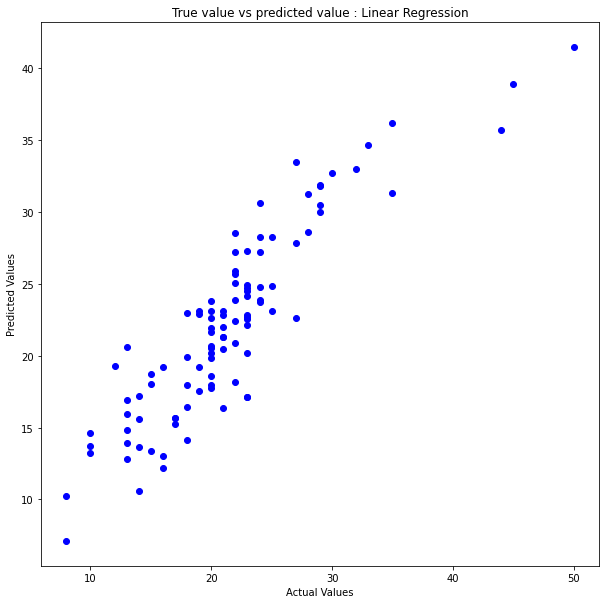

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c = 'blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

**PREDICTION WITH SCALING**

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scale = StandardScaler()
scale.fit(X_train)
trans_x_train = scale.transform(X_train)
trans_x_test = scale.transform(X_test)

In [39]:
model2 = LinearRegression()
model2.fit(trans_x_train,y_train)

LinearRegression()

In [40]:
pred2 = model2.predict(trans_x_test)
pred2

array([13.52074238, 20.21115226, 24.72469371, 25.93390425, 19.40874   ,
       22.95179076, 23.16683875, 14.04934541, 22.06180128, 18.2208046 ,
       32.17992956, 22.65141769, 38.97959927, 22.15119064, 23.29316885,
       23.47416743, 20.95583436, 16.07627927, 22.83523779, 31.3288941 ,
       23.22655314, 13.48320553, 26.08316946, 25.68283573, 32.91304172,
       24.78316428, 24.2450768 , 10.79960414, 27.55390298, 20.68740434,
       18.13865367, 17.31267185, 24.57792906, 24.10533926, 23.35478966,
       24.87364023, 25.04811602, 16.93757703, 21.53194538, 29.13204003,
       27.91335194, 24.84330268, 14.94878708, 28.62098769,  7.49894226,
       20.99237341, 23.19397544, 17.51466492, 22.13001656, 30.81913015,
       16.11159752, 22.83744779, 22.58234599, 28.83898006, 17.44795301,
       23.24184777, 20.05463839, 41.76564333, 19.60032372, 17.58005438,
       28.20899071, 17.33945169, 21.74858702, 28.57469587, 20.40587378,
       19.44413989, 22.49954012, 16.0235937 , 23.95892669, 15.11

In [41]:
print("Mean Absolute Error:",mean_absolute_error(y_test, pred2))
print("Mean Squared Error:",mean_squared_error(y_test, pred2))
print("R2 Score:",r2_score(y_test, pred2))

Mean Absolute Error: 2.777868250827563
Mean Squared Error: 12.049549431343332
R2 Score: 0.7568591600664408


In [42]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       105 non-null    int64  
 1   CRIM     105 non-null    float64
 2   ZN       105 non-null    float64
 3   INDUS    105 non-null    float64
 4   CHAS     105 non-null    int64  
 5   NOX      105 non-null    float64
 6   RM       105 non-null    float64
 7   AGE      105 non-null    float64
 8   DIS      105 non-null    float64
 9   RAD      105 non-null    int64  
 10  TAX      105 non-null    float64
 11  PTRATIO  105 non-null    float64
 12  B        105 non-null    float64
 13  LSTAT    105 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.6 KB


In [43]:
test_ds.drop('ID', inplace=True, axis=1)

In [44]:
test_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,105.0,3.100574,6.099267,0.0136,0.10084,0.2909,4.26131,45.7461
ZN,105.0,12.800000,25.384978,0.0000,0.00000,0.0000,12.50000,100.0000
INDUS,105.0,11.984095,6.854823,1.3200,6.09000,9.9000,18.10000,27.7400
CHAS,105.0,0.057143,0.233229,0.0000,0.00000,0.0000,0.00000,1.0000
NOX,105.0,0.562010,0.118159,0.3920,0.44900,0.5440,0.62400,0.8710
RM,105.0,6.253181,0.679369,3.5610,5.94900,6.1950,6.63100,7.9290
AGE,105.0,70.469524,27.410123,6.8000,47.20000,78.1000,94.50000,100.0000
DIS,105.0,3.699209,2.017964,1.2852,2.06350,2.7831,5.11670,9.2203
RAD,105.0,9.961905,8.814241,1.0000,4.00000,5.0000,24.00000,24.0000
TAX,105.0,426.219048,164.240090,188.0000,300.00000,391.0000,666.00000,711.0000


In [45]:
result = model.predict(test_ds)

In [46]:
resultant_ds=pd.DataFrame({"Predicted MEDV":result})
resultant_ds.head()

,Predicted MEDV
0,23.711575
1,24.992949
2,15.913013
3,19.850273
4,22.259246


In [47]:
output = pd.concat([test_ds,resultant_ds],axis=1)
output

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Predicted MEDV
0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40,23.711575
1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12,24.992949
2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69,15.913013
3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,19.850273
4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14,22.259246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330.0,19.1,393.74,6.56,24.384191
101,6.96215,0.0,18.10,0,0.700,5.713,97.0,1.9265,24,666.0,20.2,394.43,17.11,16.486141
102,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243.0,16.8,396.90,5.28,27.553041
103,0.10469,40.0,6.41,1,0.447,7.267,49.0,4.7872,4,254.0,17.6,389.25,6.05,35.832863


In [48]:
from google.colab import files

In [49]:
output.to_csv('output.csv') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**GRADIENT DESCENT**

In [50]:
from scipy.optimize import minimize

In [51]:
def objective_function(beta, X, y): 
  error = np.mean(np.abs(np.matmul(X,np.square(beta)) - y)) 
  return(error)

beta_init = beta_init = np.ones([13])

result = minimize(objective_function, beta_init, args=(X_train,y_train),method='BFGS', options={'maxiter': 500}) 


beta_hat = result.x 
print(beta_hat)

[ 1.57349135e-04  3.27529569e-01  5.81102099e-04  1.48733974e+00
 -6.87047498e-04  1.62287793e+00 -2.56765109e-05 -1.08861706e-02
  2.04601393e-04  8.75202334e-05  2.03508140e-04  1.07207937e-01
  4.08227193e-04]


In [52]:
coeff_final = pd.DataFrame(beta_hat,X.columns)
coeff_final.columns = ['Coefficients']
coeff_final

,Coefficients
CRIM,0.000157
ZN,0.327530
INDUS,0.000581
CHAS,1.487340
NOX,-0.000687
RM,1.622878
AGE,-0.000026
DIS,-0.010886
RAD,0.000205
TAX,0.000088
